In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
pima_df=pd.read_csv('Datasets/diabetes.csv')
x=pima_df.iloc[:,0:-1]
y=pima_df['Outcome']
pima_df.head()
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [15]:
# classifier=KNeighborsClassifier(n_neighbors=10)
# classifier.fit(x_train,y_train)
# y_pred=classifier.predict(x_test)
# print(f"accuracy_score:{accuracy_score(y_test,y_pred)}")

accuracy_score:0.6926406926406926


In [16]:
import numpy as np
neighbours=np.arange(1,20)
test_accuracy=np.empty(len(neighbours))
train_accuracy=np.empty(len(neighbours))

for i,v in enumerate(neighbours):
    classifier=KNeighborsClassifier(n_neighbors=v)
    classifier.fit(x_train,y_train)
    train_accuracy[i]=classifier.score(x_train,y_train)
    test_accuracy[i]=classifier.score(x_test,y_test)
    
print(test_accuracy)
print(train_accuracy)
    

[0.62337662 0.67099567 0.70995671 0.69264069 0.69264069 0.68831169
 0.71861472 0.68398268 0.7012987  0.69264069 0.7012987  0.71428571
 0.71428571 0.71861472 0.72294372 0.71428571 0.72727273 0.73593074
 0.74458874]
[1.         0.8566108  0.858473   0.82681564 0.82309125 0.82681564
 0.81191806 0.81564246 0.81191806 0.79888268 0.80446927 0.79888268
 0.79702048 0.79143389 0.79515829 0.78026071 0.7858473  0.78026071
 0.78957169]


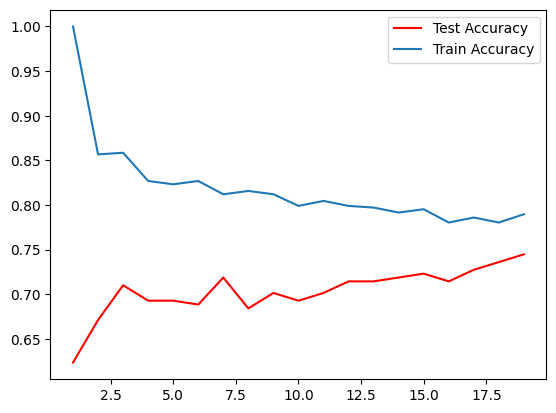

In [17]:
plt.plot(neighbours,test_accuracy,label="Test Accuracy",c='r')
plt.plot(neighbours,train_accuracy,label="Train Accuracy")
plt.legend()
plt.show()